In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_2P3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, cart_to_joint_dynamic
from ppr.sampling import get_shortest_path, iterative_bfs

In [3]:
# ROBOT
#robot1 = Robot_2P3R([6, 0.9, 1.5, 1.2, 1])
robot1 = Robot_2P3R([6, 0.9, 1.2, 1, 1])
robot1.set_joint_limits([(0, 6), (0.2, 0.9)])
robot1.ik_samples = [40, 3]

# PATH
x     = np.linspace(1, 5, 15)
dy    = TolerancedNumber(3.8, 3.6, 4.0, samples=4)
angle = TolerancedNumber(0.0, 0, np.pi, samples=20)
path1 = [TrajectoryPt([xi, dy, angle]) for xi in x]

# COLLISION SCENE
sc1 = []
sc1.append(Rectangle(-0.3, 0, 0.2, 4, 0))
sc1.append(Rectangle(6.1, 0, 0.2, 4, 0))

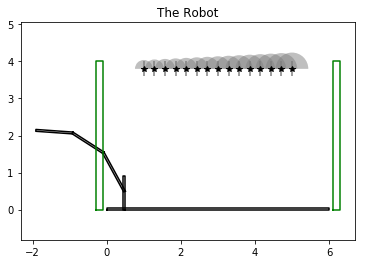

In [4]:
fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, [0.5, 0.5, 0.5, 0.5, 0.5], 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
plt.show()

In [8]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
print([len(qp) for qp in path_js])

[891, 962, 982, 984, 984, 982, 986, 988, 986, 982, 984, 984, 982, 962, 900]


In [9]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
True


In [97]:
sol = iterative_bfs(robot1, path1, sc1, tol=1e-6, red=3, max_iter=5)

converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q


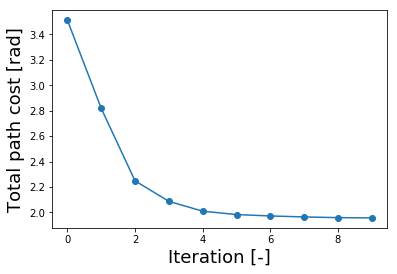

In [98]:
plt.plot(sol['length_all_iterations'], 'o-')
plt.xlabel("Iteration [-]", fontsize=18)
plt.ylabel("Total path cost [rad]", fontsize=18)
plt.show()

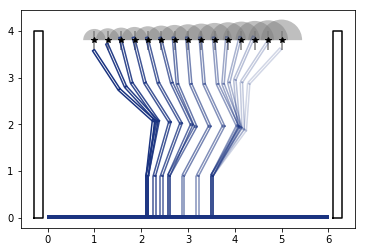

In [10]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
plt.show()

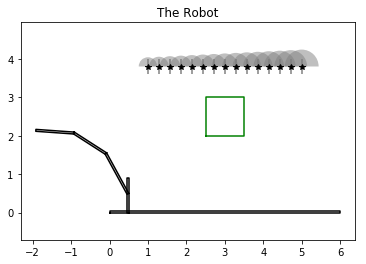

In [11]:
# New COLLISION SCENE
sc2 = []
#sc2.append(Rectangle(-0.3, 0, 0.2, 4, 0))
#sc2.append(Rectangle(6.1, 0, 0.2, 4, 0))
sc2.append(Rectangle(2.5, 2, 1, 1, 0))

fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, [0.5, 0.5, 0.5, 0.5, 0.5], 'k')
for tp in path1: tp.plot(ax1)
for r in sc2: r.plot(ax1, 'g')
plt.show()

In [12]:
from ppr.sampling import cart_to_joint
from ppr.graph_pure_python import get_shortest_path, get_shortest_path_segments

In [13]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc2)
print([len(qp) for qp in path_js])

[916, 946, 912, 801, 604, 374, 190, 75, 134, 357, 587, 788, 898, 939, 916]


In [14]:
sol = get_shortest_path_segments(path_js, 2)
print(sol['single_path'])

False


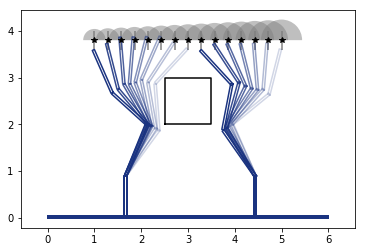

In [15]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path(ax2, sol['path'])
robot1.plot_path(ax2, sol['extra_segments'][0]['path'])
for r in sc2: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
plt.show()

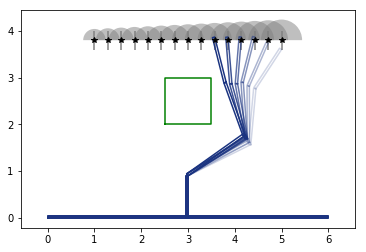

In [68]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path(ax2, sol['extra_segments'][0]['path'])
for r in sc2: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()